# 12 Fourier解析

黒木玄

2018-06-28

* Copyright 2018 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/12%20Fourier%20analysis.ipynb

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* <a href="http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f">WindowsへのJulia言語のインストール</a>

を参照せよ.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
$

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Riemann-Lebesgueの定理" data-toc-modified-id="Riemann-Lebesgueの定理-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Riemann-Lebesgueの定理</a></span><ul class="toc-item"><li><span><a href="#階段函数" data-toc-modified-id="階段函数-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>階段函数</a></span></li><li><span><a href="#Riemann-Lebesgueの定理とその証明" data-toc-modified-id="Riemann-Lebesgueの定理とその証明-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Riemann-Lebesgueの定理とその証明</a></span></li></ul></li><li><span><a href="#Fourier変換の逆変換の収束" data-toc-modified-id="Fourier変換の逆変換の収束-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fourier変換の逆変換の収束</a></span><ul class="toc-item"><li><span><a href="#Fourier変換とFourier逆変換の定義" data-toc-modified-id="Fourier変換とFourier逆変換の定義-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fourier変換とFourier逆変換の定義</a></span></li><li><span><a href="#Dirichlet核" data-toc-modified-id="Dirichlet核-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dirichlet核</a></span></li><li><span><a href="#Dirichlet積分の公式" data-toc-modified-id="Dirichlet積分の公式-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dirichlet積分の公式</a></span></li><li><span><a href="#Riemannの局所性定理" data-toc-modified-id="Riemannの局所性定理-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Riemannの局所性定理</a></span></li><li><span><a href="#Fourier変換の逆変換の収束性-(Diniの条件)" data-toc-modified-id="Fourier変換の逆変換の収束性-(Diniの条件)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Fourier変換の逆変換の収束性 (Diniの条件)</a></span></li></ul></li><li><span><a href="#Fourier級数の収束" data-toc-modified-id="Fourier級数の収束-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fourier級数の収束</a></span><ul class="toc-item"><li><span><a href="#Fourier級数の定義" data-toc-modified-id="Fourier級数の定義-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fourier級数の定義</a></span></li><li><span><a href="#Fourier展開のDirichlet核" data-toc-modified-id="Fourier展開のDirichlet核-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fourier展開のDirichlet核</a></span></li><li><span><a href="#Fourier級数に関するRiemannの局所性定理" data-toc-modified-id="Fourier級数に関するRiemannの局所性定理-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Fourier級数に関するRiemannの局所性定理</a></span></li><li><span><a href="#Fourier級数の収束-(Diniの条件)" data-toc-modified-id="Fourier級数の収束-(Diniの条件)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Fourier級数の収束 (Diniの条件)</a></span></li></ul></li><li><span><a href="#三角函数へのFourier級数論の応用" data-toc-modified-id="三角函数へのFourier級数論の応用-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>三角函数へのFourier級数論の応用</a></span><ul class="toc-item"><li><span><a href="#cosecとcotの部分分数展開" data-toc-modified-id="cosecとcotの部分分数展開-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>cosecとcotの部分分数展開</a></span></li><li><span><a href="#sinの無限積表示" data-toc-modified-id="sinの無限積表示-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>sinの無限積表示</a></span></li><li><span><a href="#ガンマ函数とsinの関係" data-toc-modified-id="ガンマ函数とsinの関係-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ガンマ函数とsinの関係</a></span></li><li><span><a href="#Wallisの公式" data-toc-modified-id="Wallisの公式-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Wallisの公式</a></span></li><li><span><a href="#Stirlingの近似公式" data-toc-modified-id="Stirlingの近似公式-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Stirlingの近似公式</a></span></li><li><span><a href="#ゼータ函数の正の偶数での特殊値" data-toc-modified-id="ゼータ函数の正の偶数での特殊値-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>ゼータ函数の正の偶数での特殊値</a></span></li><li><span><a href="#Lobachevskyの公式" data-toc-modified-id="Lobachevskyの公式-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Lobachevskyの公式</a></span></li></ul></li><li><span><a href="#Poissonの和公式" data-toc-modified-id="Poissonの和公式-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Poissonの和公式</a></span><ul class="toc-item"><li><span><a href="#Poissonの和公式とその証明" data-toc-modified-id="Poissonの和公式とその証明-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Poissonの和公式とその証明</a></span></li><li><span><a href="#モジュラー変換性を持つ函数の例" data-toc-modified-id="モジュラー変換性を持つ函数の例-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>モジュラー変換性を持つ函数の例</a></span></li></ul></li></ul></div>

In [1]:
using Plots
gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
clibrary(:misc)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy[:init_printing](order="lex") # default
#sympy[:init_printing](order="rev-lex")

using SpecialFunctions
using QuadGK

## Riemann-Lebesgueの定理

### 階段函数

空でない区間 $I$ 上の函数で部分集合 $A$ 上で $1$, その外で $0$ になる函数を $\chi_A(x)$ と書く:

$$
\chi_A(x) = \begin{cases}
1 & (x\in A) \\
0 & (x\not\in A).
\end{cases}
$$

区間 $I$ に含まれる**長さが有限**の区間 $I_1,\ldots,I_n$ と数 $\alpha_1,\ldots,\alpha_n$ によって定まる函数

$$
s(x) = \sum_{i=1}^n \alpha_i\chi_A(x) \quad (x\in I)
$$

を区間 $I$ 上の**階段函数**と呼ぶことにする.

$f$ は区間 $I$ 上の函数であるとする. 任意の $\eps>0$ に対してある階段函数 $s(x)$ で

$$
\|f-s\|_1 = \int_I |f(x)-s(x)|\,dx < \eps
$$

を満たすものが存在するとき, $f$ は**階段函数で $L^1$ 近似可能**であるということにする. ここで $I=[a,b], [a,b), (a,b], (a,b)$ のとき $\int_I=\int_ab$ であるとする. $a=-\infty$ であっても $b=\infty$ であっても構わないとする.

**問題:** $\R=(-\infty,\infty)$ 上の連続函数 $f(x)$ で $\int_{-\infty}^\infty |f(x)|\,dx < \infty$ を満たすものは階段函数で $L^1$ 近似可能であることを示せ.

**解答例:** 任意に $\eps>0$ を取る $\int_{-\infty}^\infty |f(x)|\,dx < \infty$ より, 十分に $R>0$ を大きくすると, 

$$
\int_{-\infty}^{-R}|f(x)|\,dx + \int_R^\infty |f(x)|\,dx =
\int_{-\infty}^\infty |f(x)|\,dx - \int_{-R}^R |f(x)|\,dx < \frac{\eps}{2}.
$$

$f(x)$ は $[-R,R]$ 上で一様連続なので, 正の整数 $N$ を十分に大きくして, 区間 $[-R,R]$ を $N$ 等分したものを $I_1,\ldots,I_N$ として, $x_i\in I_i$ を任意に取ると,  

$$
|f(x)-f(x_i)|< \frac{\eps}{4R} \quad (x\in I_i,\ i=1,\ldots,N).
$$

ここで, 例えば $\Delta = 2R/N$, $a_i=R+i\Delta$, $I_1=[a_0,a_1)$, $\ldots$, $I_{N-1}=[a_{N-2},a_{N-1}])$, $I_N=[a_{N-1},a_N]$ とおいたと考えてよい. このとき階段函数 $s(x)$ を

$$
s(x)=\sum_{i=1}^N f(x_i)\chi_{I_i}(x)
$$

と定めると,

$$
|f(x)-f(x_i)| < \frac{\eps}{4R} \quad (-R\leqq x\leqq R).
$$

このとき

$$
\int_{-R}^R|f(x)-s(x)|\,dx \leqq \frac{\eps}{4R}2R = \frac{\eps}{2}.
$$

したがって,

$$
\begin{aligned}
\|f-s\|_1 &= \int_{-\infty}^\infty|f(x)-s(x)|\,dx 
\\ &=
\int_{-\infty}^{-R} |f(x)-s(x)|\,dx + \int_{-R}^R|f(x)-s(x)|\,dx + \int_R^\infty|f(x)-s(x)|\,dx 
\\ &=
\int_{-\infty}^{-R} |f(x)|\,dx + \int_{-R}^R|f(x)-s(x)|\,dx + \int_R^\infty|f(x)|\,dx 
\\ &< 
\frac{\eps}{2}+\frac{\eps}{2}=\eps.
\end{aligned}
$$

これで示すべきことが示された. $\QED$

**注意:** この注意はLebesgue積分論の知識を前提とする. 一般に区間上の可測函数 $f(x)$ で

$$
\int_I |f(x)|\,dx < \infty
$$

を満たすものを, $I$ 上の **$L^1$ 函数** または**可積分函数**(もしくは**積分可能函数**)と呼ぶ. $I$ 上 $L_1$ 函数は $I$ 上の階段函数で $L^1$ 近似可能であることが知られている. $\QED$

**補題:** 区間 $I$ 上の階段函数 $s(x)$ について

$$
\int_I s(x) e^{ipx}\,dx \to 0 \quad (|p|\to\infty).
$$

**証明:** $-\infty<a_j\leqq b_j<\infty$, $I_j=[a_j,b_j], [a_j,b_j), (a_j,b_j], (a_j,b_j)$ だとすると, $|p|\to\infty$ のとき,

$$
\int_I \chi_{I_j}(x)e^{ips}\,dx = 
\int_{a_j}^{b_j} e^{ipx}\,dx = 
\left[\frac{e^{ipx}}{ip}\right]_{x=a_j}^{x=b_j} =
\frac{e^{ipb_j} - e^{ipa_j}}{ip} \to 0.
$$

階段函数は $\chi_{I_j}(x)$ の有限一次結合なので補題の結果が成立することもわかる.  $\QED$

**問題** $a\leqq b$ の取り方によらずに不等式

$$
\left|\int_a^b e^{ipx}\,dx\right|\leqq \frac{2}{|p|}
$$

が成立することを示し, このようなことが起こる理由について考えよ.

**解答例:**
$$
\left|\int_a^b e^{ipx}\,dx\right| = \left|\frac{e^{ipb}-e^{ipa}}{ip}\right| \leqq 
\frac{|e^{ipb}|+|e^{ipa}|}{|p|} = \frac{2}{|p|}.
$$

ただし, $\leqq$ では三角不等式を使った.

$e^{ipx}$ は周期 $2\pi/|p|$ を持つ函数であり, ちょうど周期分だけ積分すると $0$ になる性質を持っている:

$$
\int_c^{c+2\pi/|p|} e^{ipx}\,dx = 0.
$$

ゆえに, 整数 $n$ で $a+2\pi n/|p| \leqq |b|$ となる最大のものを $N$ と書くと, 

$$
\int_a^b e^{ipx}\,dx = \int_{a+2\pi n/|p|}^b e^{ipx}\,dx, \quad
b - a+\frac{2\pi n}{|p|} < \frac{2\pi}{|p|}.
$$

これより, 

$$
\left|\int_a^b e^{ipx}\,dx\right| \leqq \int_{a+2\pi n/|p|}^b \,dx < \frac{2\pi}{|p|}.
$$

これは上の問題の結果よりは荒い結果だが, この方法ではどのような仕組みで積分の絶対値の値が小さくなるかはよくわかる.  振動によってほとんど打ち消しあって消えて, 積分区間の端の部分で打ち消し合いが起こらない分だけ積分の値が生き残る. 打ち消し合いが不完全な積分区間の幅は小さくなり, 打ち消し合いが不完全な分だけ生き残った積分の値の絶対値も小さくなる. $\QED$

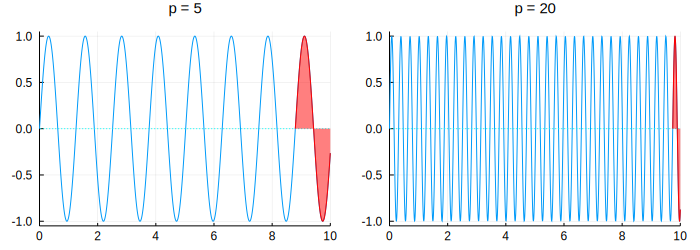

In [2]:
# e^{ipx} を sin(px) に置き換えた場合の図

a = 0.0
b = 10.0
f(p,x) = sin(p*x)
maxa(a,b,p) = a + 2π/abs(p)*fld(b-a, 2π/abs(p))
x = a:0.01:b
PP = []
for p in [5, 20]
    xx = maxa(a,b,p):0.001:b
    P = plot(title="p = $p", titlefontsize=10)
    plot!(legend=false, ylims=(-1.05,1.05))
    plot!(x, f.(p,x))
    hline!([0], color=:cyan, ls=:dot)
    plot!(xx, f.(p,xx), color=:red, fill=(0, 0.5, :red))
    push!(PP, P)
end
plot(PP..., size=(700, 250))

### Riemann-Lebesgueの定理とその証明

**定理(Riemann-Lebesgue):** $f$ は区間 $I$ 上の階段函数で $L^1$ 近似可能な函数であるとする. (Lebesgue積分論を知っている人は, $f(x)$ は区間 $I$ 上の $L^1$ 函数であると仮定してもよい.) このとき,

$$
\int_I f(x)e^{ipx}\,dx \to 0 \quad (|p|\to\infty).
$$

**証明:** 任意に $\eps>0$ を取る. $f(x)$ は階段函数で $L^1$ 近似可能なので, ある階段函数 $\ds s(x)=\sum_{i=1}^n a_i\chi_{I_i}(x)$ で

$$
\|f-s\|_1=\int_I |f(x)-s(x)|\,dx < \frac{\eps}{2}
$$

を満たすものが存在する. 階段函数に関する補題より, ある $R>0$ が存在して, $|p|\geqq R$ ならば

$$
\left|\int_I s(x)e^{ipx}\,dx\right|<\frac{\eps}{2}.
$$

そのとき, 

$$
\begin{aligned}
\left|\int_I f(x)e^{ipx}\,dx\right| &=
\left|\int_I (f(x)-s(x))e^{ipx}\,dx  + \int_I s(x)e^{ipx}\,dx\right| 
\\ &\leqq
\left|\int_I (f(x)-s(x))e^{ipx}\,dx\right| + \left|\int_I s(x)e^{ipx}\,dx\right| 
\\ &\leqq
\int_I |f(x)-s(x)|\,dx + \left|\int_I s(x)e^{ipx}\,dx\right| 
\\ &=
\|f-s\|_1 + \left|\int_I s(x)e^{ipx}\,dx\right| <
\frac{\eps}{2}+\frac{\eps}{2} = \eps.
\end{aligned}
$$

これで $|p|\to\infty$ で $\int_I f(x)e^{ipx}\,dx\to 0$ となることがわかった. $\QED$

**解説:** Riemann-Lebesgueの定理(リーマン・ルベーグの定理)は $|p|$ を大きくすると, $e^{ipx}$ が $x$ についてより細かく振動するようになるので, $e^{ipx}$ と積を取ってから積分すると, 実部と虚部それぞれの正の成分と負の成分が互いに打ち消され易くなって, 積分の絶対値の値が小さくなることを意味している. $\QED$

## Fourier変換の逆変換の収束

### Fourier変換とFourier逆変換の定義

$\R$ 上の函数 $f(x)$ の**Fourier変換** $\hat{f}(p)$ を次のように定義する:

$$
\hat{f}(p) = \int_\R f(x)e^{-2\pi ipx}\,dx.
$$

さらに $\R$ 上の函数 $g(p)$ の**Fourier逆変換** $\check{g}(x)$ を次のように定義する:

$$
\check{g}(x) = \int_\R g(p)e^{2\pi ipx}\,dp.
$$

$f(x)$ が $\R$ 上の $L^1$ 函数ならば, Lebesgueの収束定理より $\hat{f}(p)$ は $p$ の連続函数になり, Riemann-Lebegueの定理より $|p|\to\infty$ で $\hat{f}(p)\to 0$ となる. 

**注意:** Fourier変換とFourier逆変換を, 上の公式における $p$ を $p/(2\pi)$ で置き換えることによって, 

$$
\hat{f}(p) = \int_\R f(x)e^{-ipx}\,dx, \quad
\check{g}(p) = \frac{1}{2\pi}\int_\R g(p)e^{ipx}\,dp
$$

と定義するスタイルもよく使われている. $\QED$

この節では, $L^1$ 函数 $f(x)$ に対して, 

$$
f(x) = \lim_{N\to\infty} \int_{-N}^N \hat{f}(p)e^{ipx}\,dp 
$$

がいつ成立しているかを調べる. 

### Dirichlet核

**Dirichlet核** $D_N(x)$ を

$$
D_N(x) = \int_{-N}^N e^{2\pi ipx}\,dp = \left[\frac{e^{2\pi ipx}}{2\pi ix}\right]_{p=-N}^{p=N} =
\frac{e^{e\pi iNx}-e^{-2\pi iNx}}{2\pi ix} = \frac{\sin(2\pi Nx)}{\pi x}
$$

と定める. ただし, $D_N(0)=2N$ と定めておく. $D_N(x)$ は有界な偶函数になる.

このとき

$$
\begin{aligned}
\int_{-N}^N \hat{f}(p)e^{2\pi ipx}\,dp &=
\int_{-N}^N \left(\int_\R f(y)e^{-2\pi ipy}\,dy\right)e^{2\pi ipx}\,dp =
\int_\R f(y) \left(\int_{-N}^N e^{2\pi ip(x-y)}\,dp\right)\,dy
\\ &=
\int_\R f(y) D_N(x-y)\,dy =
\int_\R f(x+y) D_N(y)\,dy.
\end{aligned}
$$

最後の等号で $y$ を $x+y$ で置き換えて, $D_N(-y)=D_N(y)$ を使った.

**問題:** Dirichlet核のグラフを描け. $\QED$

**解説:** $N$ が大きくなると, Dirichelt核 $D_N(x)$ のグラフの振動の仕方は細かくなり, $x=0$ の近くでの値も大きくなる.

次のセルを見よ. $\QED$

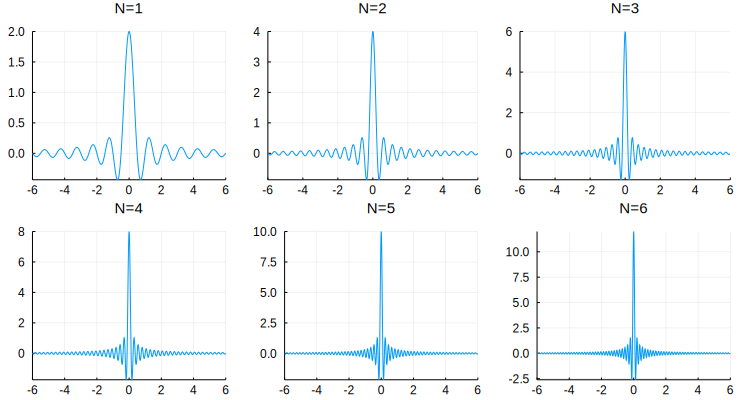

In [3]:
# ディリクレ核 D_N(x) のグラフ

D(N,x) = iszero(x) ? 2N : sin(2π*N*x)/(π*x)
PP = []
for N in [1,2,3,4,5,6]
    x = -6:0.01:6
    P = plot(x, D.(N,x), title="N=$N", titlefontsize=10)
    push!(PP, P)
end
plot(PP..., size=(750, 400), legend=false)

### Dirichlet積分の公式

条件収束する広義積分に関する公式

$$
\ds\int_0^\infty\frac{\sin t}{t}\,dt=\frac{\pi}{2}
$$

より

$$
\int_{-\infty}^\infty D_N(x)\,dx = \frac{2}{\pi}\int_0^\infty \frac{\sin(2\pi Nx)}{x}\,dx =
\frac{2}{\pi}\int_0^\infty \frac{\sin(2\pi Nx)}{x}\,dx = \frac{2}{\pi}\frac{\pi}{2}=1.
$$

三番目の等号で $x=t/(2\pi N)$ と置換して計算した.  この公式は条件収束する積分の公式であることに注意せよ.

上の公式(**Dirichlet積分の公式**と呼ばれる)については

* <a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/09%20integration.ipynb">09 積分</a>

の<a href="http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/09%20integration.ipynb#Dirichlet積分とその一般化">Dirichlet積分とその一般化</a>の解説を参照せよ.

**Dirichlet積分の公式補足:** 条件収束する広義積分に関する次の公式が成立している:

$$
\int_{-\infty}^\infty \frac{\sin(ax)}{\pi x}\,dx = \sign(a) =
\begin{cases}
1 & (a<0) \\
0 & (a=0) \\
-1 & (a>0).
\end{cases}
$$

**証明:** $a=0$ のとき, 被積分函数が恒等的に $0$ になるので, 積分も $0$ になる. $a\ne 0$ と仮定する.

$$
\int_{-\infty}^\infty \frac{\sin(ax)}{\pi x}\,dx = \frac{2}{\pi}\int_0^\infty \frac{\sin(ax)}{x}\,dx
$$

であるから, $x = t/|a|$ と置換すると, $a/|a|=\sign(a)$ なので,

$$
\frac{2}{\pi}\int_0^\infty \frac{\sin(ax)}{x}\,dx =
\frac{2}{\pi}\int_0^\infty \frac{\sign(a)\sin(t)}{t}\,dt = \sign(a)\frac{2}{\pi}\frac{\pi}{2}=\sign(a).
\qquad\QED
$$

### Riemannの局所性定理

**Riemannの局所性定理:** $f$ は $\R$ 上の $L^1$ 函数であるとし, $\delta>0$ であるとする. このとき,

$$
\lim_{N\to\infty}\int_{-\infty}^{-\delta} f(x+y)D_N(y)\,dy = 0, \quad
\lim_{N\to\infty}\int_\delta^\infty f(x+y)D_N(y)\,dy = 0.
$$

これより, $\ds\int_{-N}^N \hat{f}(p)e^{2\pi ipx}\,dp = \int_\R f(x+y) D_N(y)\,dy$ が $N\to\infty$ で収束することと, $\ds\int_{-\delta}^\delta f(x+y) D_N(y)\,dy$ が $N\to\infty$ で収束することは同値であり, 収束する場合には同じ値に収束することがわかる.  後者が収束するか否かは $x$ の近くでの函数 $f$ の様子だけで決まることに注意せよ. 

**証明:**
$$
\begin{aligned}
&
\int_{-\infty}^{-\delta} f(x+y)D_N(y)\,dy = \int_{-\infty}^{-\delta} \frac{f(x+y)}{y} \sin(2\pi Ny)\,dy,
\\ &
\int_\delta^\infty f(x+y)D_N(y)\,dy = \int_{-\infty}^{-\delta} \frac{f(x+y)}{y} \sin(2\pi Ny)\,dy.
\end{aligned}
$$

であり, 区間 $(-\infty,-\delta)$ と $(\delta,\infty)$ のそれぞれの上で函数 $f(x+y)/y$ は $L^1$ 函数なので, Riemann-Lebesgueの定理より, これらは $N\to\infty$ で $0$ に収束する. $\QED$

### Fourier変換の逆変換の収束性 (Diniの条件)

**補題:** $\delta>0$ のとき,

$$
\lim_{N\to\infty}\int_{-\infty}^{-\delta} D_N(y)dy = 0, \quad
\lim_{N\to\infty}\int_\delta^\infty D_N(y)dy = 0. 
$$

**注意:** 条件収束する広義積分の極限に関する結果なのでRiemann-Lebesgueの定理を直接使用できない. $\QED$

**証明:** $D_N(y)$ は偶函数なので後者のみを示せば十分である. Dirichlet積分の公式より $\ds\lim_{N\to\infty}\int_0^{2\pi N\delta} \frac{\sin t}{t}\,dt=\frac{\pi}{2}$ なので, $\ds\lim_{N\to\infty}\int_{2\pi N\delta}^\infty \frac{\sin t}{\pi t}\,dt=0$ となることがわかる. ゆえに, $x=t/(2\pi N)$ とおくと, 

$$
\int_\delta^\infty D_N(y)dy = \int_\delta^\infty \frac{\sin(2\pi Nx)}{\pi x}\,dx =
\int_{2\pi N\delta}^\infty \frac{\sin t}{\pi t}\,dt\to 0 \quad (N\to\infty).
\qquad\QED
$$

**定理(Diniの条件):** $f$ は $\R$ 上の $L^1$ 函数であり, $x\in \R$ であるとする.とする. さらに, ある $\delta>0$ が存在して, 

$$
\int_0^\delta \frac{|(f(x+y) + f(x-y) - 2f(x)|}{y}\,dy <\infty
\tag{$*$}
$$

が成立していると仮定する. この条件($*$)を**Diniの条件**と呼ぶ. このとき, 

$$
\lim_{N\to\infty}\int_{-N}^N \hat{f}(p)e^{2\pi ipx}\,dp = \lim_{N\to\infty}\int_\R f(x+y) D_N(y)\,dy = f(x).
$$

**証明:** $\int_{-N}^N \hat{f}(p)e^{2\pi ipx}\,dp - f(x)$ が $N\to\infty$ で $0$ に収束することを示せばよい. 

$$
\begin{aligned}
\int_{-N}^N \hat{f}(p)e^{2\pi ipx}\,dp - f(x) &=
\int_\R f(x+y) D_N(y)\,dy - f(x) \int_{-\infty}^\infty D_N(y)\,dy
\\ &=
\int_{-\infty}^\infty (f(x+y)-f(x)) D_N(y)\,dy
\\ &=
\int_0^\infty (f(x+y)-f(x)) D_N(y)\,dy +
\int_{-\infty}^0 (f(x+y)-f(x)) D_N(y)\,dy
\\ &=
\int_0^\infty (f(x+y)-f(x)) D_N(y)\,dy +
\int_0^\infty (f(x-y)-f(x)) D_N(y)\,dy
\\ &=
\int_0^\infty (f(x+y)+f(x-y)-2f(x)) D_N(y)\,dy
\\ &=
\int_0^\infty \frac{f(x+y)+f(x-y)-2f(x)}{y} \frac{\sin(2\pi N y)}{\pi}\,dy = I_N + J_N.
\end{aligned}
$$

ここで, 

$$
\delta > 0, \quad
I_N = \int_0^\delta \frac{f(x+y)+f(x-y)-2f(x)}{y} \frac{\sin(2\pi N y)}{\pi}\,dy, \quad
J_N = \int_\delta^\infty \frac{f(x+y)+f(x-y)-2f(x)}{y} \frac{\sin(2\pi N y)}{\pi}\,dy.
$$

$N\to\infty$ のとき, Riemannの局所性定理と上の補題より $J_N\to 0$ となり, Diniの条件の仮定とRiemann-Lebesgueの定理より $I_N\to 0$ となる. これで示したいことが示せた. $\QED$

**例:** $f$ は $\R$ 上の $L^1$ 函数であるとする. $y\searrow 0$ のとき $f(x+y), f(x-y)$ は収束していると仮定し, それぞれの収束先を $f(x+0), f(x-0)$ と書くことにする. さらに $y\searrow 0$ で $\ds\frac{f(x+y)-f(x+0)}{y}$ と $\ds\frac{f(x-y)-f(x-0)}{y}$ は収束していると仮定する. 

このとき, 十分小さな $\delta>0$ を取ると, $\ds\frac{f(x+y)+f(x-y)-(f(x+0)+f(x-0))}{y}$ は $0<y<\delta$ で有界になり, 特にそこで可積分になる. ゆえに $f(x)=(f(x+0)+f(x-0))/2$ ならば, Diniの条件が満たされており, 上の定理より,

$$
\lim_{N\to\infty}\int_{-N}^N \hat{f}(p)e^{2\pi ipx}\,dp = \lim_{N\to\infty}\int_\R f(x+y) D_N(y)\,dy = f(x).
$$

特に $f$ が $x$ で微分可能ならばこれが成立している. さらにもしもFourier変換 $\hat{f}(p)$ が可積分でかつDiniの条件が満たされているならば,

$$
\hat{f}(p)=\int_{-\infty}^\infty f(x)e^{-2\pi ipx}\,dx
\implies
\int_{-\infty}^\infty \hat{f}(p)e^{2\pi ipx}\,dp = f(x)
$$

が絶対収束する積分の公式として成立している. $\QED$

**例:** $a>0$ であるとし, $f(x)$ を

$$
f(x) = \begin{cases}
1 & (-a<x<a) \\
1/2 & (a=\pm a) \\
0 & (\text{otherwise})
\end{cases}
$$

と定める. このとき, Diniの条件が満たされているので, 

$$
\lim_{N\to\infty}\int_{-N}^N \hat{f}(p)e^{2\pi ipx}\,dp = f(x)
\tag{$*$}
$$

が成立している. これを直接の計算で確認してみよう.

$$
\hat{f}(p) = \int_{-a}^a e^{-2\pi ipx}\,dx = \frac{e^{-2\pi ipa}-e^{2\pi ipa}}{-2\pi ip} =
\frac{\sin(2\pi a p)}{\pi p}.
$$

ゆえに, 

$$
\begin{aligned}
\int_{-N}^N \hat{f}(p)e^{2\pi ipx}\,dp &=
\int_{-N}^N \frac{\sin(2\pi ap)}{\pi p} e^{2\pi ipx}\,dp =
\int_{-N}^N \frac{\sin(2\pi ap)\cos(2\pi xp)}{\pi p}\,dp
\\ &=
\frac{1}{2}\int_{-N}^N \frac{\sin(2\pi(a+x)p)+\sin(2\pi(a-x)p)}{\pi p}\,dp.
\end{aligned}
$$

2つ目の等号で $\ds e^{2\pi ipx}=\cos(2\pi xp)+i\sin(2\pi xp)$ と $\ds\frac{\sin(2\pi a p)\sin(2\pi xp)}{\pi p}$ が $p$ の奇函数であることを用いた. 3つ目の等号では三角函数の加法公式を使って示される $2\sin\alpha\,\cos\beta = \sin(\alpha+\beta) + \sin(\alpha-\beta)$ を用いた.

そして, Dirichlet積分の公式より, 

$$
\begin{aligned}
&
\lim_{N\to\infty}\frac{1}{2}\int_{-N}^N \frac{\sin(2\pi(a+x)p)}{\pi p}\,dp =
\begin{cases}
1/2 & (x>-a) \\
0 & (x=a) \\
-1/2 & (x<-a),
\end{cases}
\\ &
\lim_{N\to\infty}\frac{1}{2}\int_{-N}^N \frac{\sin(2\pi(a-x)p)}{\pi p}\,dp =
\begin{cases}
1/2 & (x<a) \\
0 & (x=a) \\
-1/2 & (x>a).
\end{cases}
\end{aligned}
$$

以上を合わせると, 式($*$)が成立していることがわかる. $\QED$

## Fourier級数の収束

Fourier変換の逆変換の収束の議論とほぼ同じ議論を以下では行う.

### Fourier級数の定義

$f(x)$ は周期 $1$ を持つ $\R$ 上の函数であると仮定する: $f(x+1)=f(x)$.  このとき, 整数 $k\in\Z$ に対して, $f(x)$ の**Fourier係数** $a_k(f)$ を

$$
a_k(f) = \int_0^1 f(x)e^{-2\pi i kx}\,dx
$$

と定める. そして, 

$$
\sum_{k\in\Z} a_k(f) e^{2\pi ikx}
$$

を $f(x)$ の**Fourier級数展開**と呼ぶ. 

### Fourier展開のDirichlet核

**Dirichlet核** $D_N(x)$ を

$$
D_N(x) = \sum_{k=-N}^N e^{2\pi ikx} = e^{-2\pi iNx}\frac{e^{2\pi i(2N+1)x}-1}{e^{2\pi i x}-1} =
\frac{\sin(\pi(2N+1)x)}{\sin(\pi x)}
$$

と定める. ただし, $x\in\Z$ のときには $D_N(x)=2N+1$ と定めておく.  $D_N(x)$ は有界な偶函数で周期 $1$ を持つ.

このとき, 

$$
\begin{aligned}
\sum_{k=-N}^N a_k(f)e^{2\pi ikx} &=
\sum_{k=-N}^N \left(\int_0^1 f(y)e^{2\pi i ky}\,dy\right)e^{2\pi ikx} =
\int_0^1 f(y)\left(\sum_{k=-N}^N e^{2\pi i k(x-y)}\,dx\right)\,dy 
\\ &=
\int_0^1 f(y)D_N(x-y)\,dy =
\int_{-1/2}^{1/2} f(x+y)D_N(y)\,dy.
\end{aligned}
$$

最後の等号で $y$ を $x+y$ で置換し, $D_N(-y)=D_N(y)$ と $f(x+y)D_N(y)$ が $y$ について周期 $1$ を持つ函数になることを用いた.

$$
\int_0^1 D_N(y)\,dy = \sum_{k=-N}^N\int_0^1 e^{2\pi iky} \,dy = \int_0^1 1 \,dy = 1.
$$

**問題:** Fourier級数のDirichlet核のグラフを描け. $\QED$

**解説:** 上の $D_N(x)$ は $D_N(x+1)=D_N(x)$ を満たしているので, $-1/2\leqq x\leqq 1/2$ でグラフを描けば十分である. $D_N(x)$ のグラフは $N$ 個の山を持ち, 振動が細かくなり, $N$ が大きくなると, $x=0$ の近くでは(より正確には整数の近くの $x$ においては) $D_N(x)$ の値が大きくなり, 他での値は小さくなる.

次のセルを見よ. $\QED$

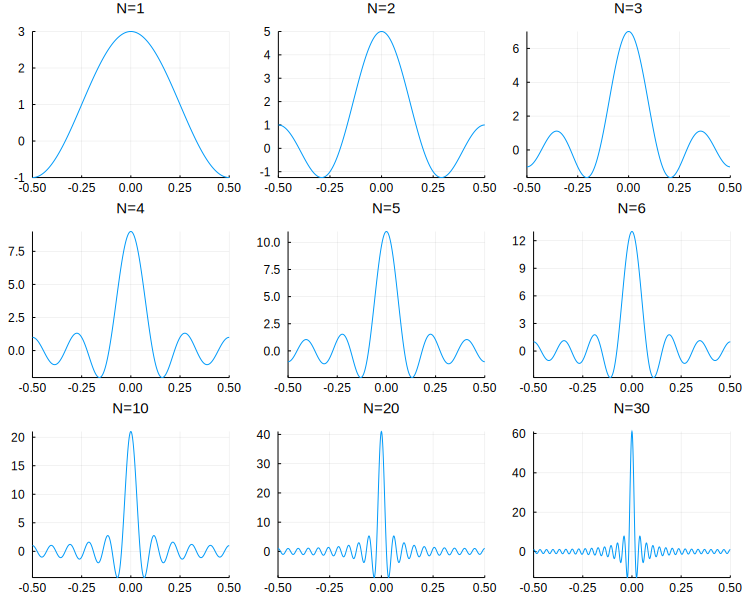

In [4]:
# フーリエ級数のディリクレ核 D_N(x) のグラフ

D(N,x) = iszero(x) ? 2N+1 : sin(π*(2N+1)*x)/(sin(π*x))
PP = []
for N in [1:6; 10; 20; 30]
    x = -0.5:0.001:0.5
    P = plot(x, D.(N,x), title="N=$N", titlefontsize=10)
    push!(PP, P)
end
plot(PP..., size=(750, 600), legend=false)

**問題:** Fourier級数のDirichlet核 $\ds D_N(x)=\frac{\sin(\pi(2N+1)x)}{\sin(\pi x)}$ は上の方で示したように, $\int_0^1 D_N(x)\,dx=1$ を満たしている. しかし, その絶対値 $|D_N(x)|$ の積分については,

$$
\int_0^1 |D_N(x)|\,dx \to \infty \quad (N\to\infty)
$$

が成立していることを示せ.

**解答例:** $|\sin(\pi x)| \leqq \pi |x|$ なので,

$$
\int_0^1 |D_N(x)|\,dx = 2\int_0^{1/2} |D_N(x)|\,dx \geqq
2\int_0^{1/2} \frac{|\sin(\pi(2N+1)x)|}{\pi x}\,dx.
$$

$x=t/(π(2N+1))$ と置換すると, 

$$
\begin{aligned}
&
2\int_0^{1/2} \frac{|\sin(\pi(2N+1)x)|}{\pi x}\,dx =
\frac{2}{\pi}\int_0^{\pi(2N+1)/2} \frac{|\sin t|}{t}\,dt =
\frac{2}{\pi}\sum_{k=1}^{2N+1}\int_{(k-1)\pi/2}^{k\pi/2} \frac{|\sin t|}{t}\,dt
\\ &\qquad\geqq
\frac{2}{\pi}\sum_{k=1}^{2N+1}\int_{(k-1)\pi/2}^{k\pi/2}\frac{|\sin t|}{k\pi/2}\,dt =
\left(\frac{2}{\pi}\right)^2\int_0^{\pi/2}\sin t\,dt \sum_{k=1}^{2N+1}\frac{1}{k} =
\left(\frac{2}{\pi}\right)^2\sum_{k=1}^{2N+1}\frac{1}{k}.
\end{aligned}
$$

そして, $\ds\sum_{k=1}^{2N+1}\frac{1}{k}\sim\log(2N+1)=O(\log N)$. 以上をまとめると,

$$
\int_0^1 |D_N(x)|\,dx \geqq \left(\frac{2}{\pi}\right)^2\sum_{k=1}^{2N+1}\frac{1}{k} = O(\log N).
$$

これより, 左辺は $N\to\infty$ のとき $\log N$ 以上のオーダーで無限大に発散することがわかる. $\QED$

**解説:** $N\to \infty$ のとき, $\ds \int_0^1 D_N(x)\,dx=1$ の左辺の積分はそれぞれ $\infty,-\infty$ に発散する正と負の成分が互いにキャンセルすることによって有限の値が残るという計算になる. これが, Fourier級数の収束の理論がややこしくなる理由であると考えられる. $\QED$

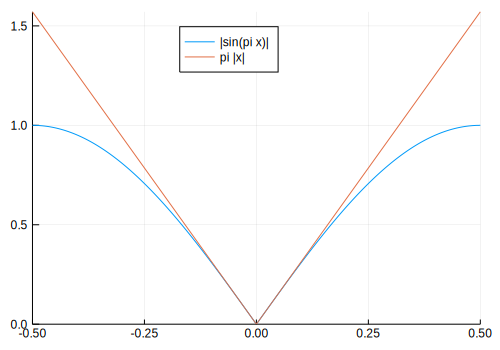

In [5]:
# |sin πx| ≤ π|x| の確認

f(x) = abs(sin(π*x))
g(x) = π*abs(x)
x = -1/2:0.002:1/2
plot(size=(500, 350), legend=:top)
plot!(x, f.(x), label="|sin(pi x)|")
plot!(x, g.(x), label="pi |x|")

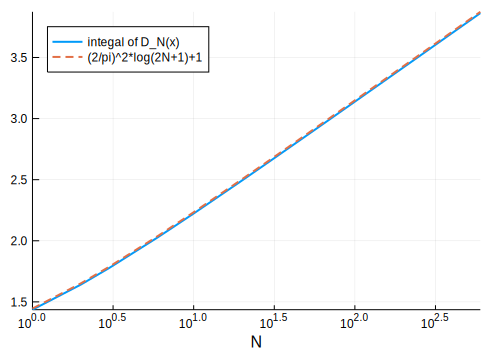

In [6]:
# |D_N(x)| の積分の漸近挙動の確認

D(N,x) = iszero(x) ? π*(2N+1) : sin(π*(2N+1)*x)/sin(π*x)
F(N) = quadgk(x-> abs(D(N,x)), 0, 1)[1]
G(N) = (2/π)^2*log(2N+1)+1
n = [1,2,3,6,10,20,30,60,100,200,300,600]
plot(size=(500,350), legend=:topleft, xlabel="N", xscale=:log)
plot!(n, F.(n), label="integal of D_N(x)", lw=2)
plot!(n, G.(n), label="(2/pi)^2*log(2N+1)+1", lw=2, ls=:dash)

### Fourier級数に関するRiemannの局所性定理

**Riemannの局所性定理:** $f$ は $\R$ 上の周期 $1$ を持つ函数であり, $[0,1)$ 上で可積分であると仮定し, $0<\delta<1/2$ であるとする. このとき, 

$$
\lim_{N\to\infty}\int_{-1/2}^{-\delta} f(x+y)D_N(y)\,dy = 0, \quad
\lim_{N\to\infty}\int_\delta^{1/2} f(x+y)D_N(y)\,dy = 0.
$$

これより, $\ds\sum_{k=-N}^N a_n(f)e^{2\pi ikx} = \int_{-1/2}^{1/2} f(x+y) D_N(y)\,dy$ が $N\to\infty$ で収束することと, $\ds\int_{-\delta}^\delta f(x+y) D_N(y)\,dy$ が $N\to\infty$ で収束することは同値であり, 収束する場合には同じ値に収束することがわかる.  後者が収束するか否かは $x$ の近くでの函数 $f$ の様子だけで決まることに注意せよ. 

**証明:**
$$
\begin{aligned}
&
\int_{-1/2}^{-\delta} f(x+y)D_N(y)\,dy = \int_{-1/2}^{-\delta} \frac{f(x+y)}{\sin(\pi y)}\sin(\pi(2N+1)y\,dy,
\\ &
\int_\delta^{1/2} f(x+y)D_N(y)\,dy = \int_\delta^{1/2} \frac{f(x+y)}{\sin(\pi y)}\sin(\pi(2N+1)y\,dy.
\end{aligned}
$$

であり, 区間 $(-1/2,-\delta)$, $(\delta,1/2)$ で $\ds \frac{f(x+y)}{\sin(\pi y)}$ は可積分なので, Riemann-Lebesgueの定理より, これらは $N\to\infty$ で $0$ に収束する. $\QED$

### Fourier級数の収束 (Diniの条件)

**定理(Diniの条件):** $f$ は $\R$ 上の周期 $1$ を持つ函数であり, 区間 $[0,1)$ 上で可積分であると仮定し, $x\in \R$ であるとする. さらに, $0<\delta<1/2$ を満たすある実数 $\delta$ が存在して,  

$$
\int_0^\delta \frac{|(f(x+y) + f(x-y) - 2f(x)|}{y}\,dy <\infty
\tag{$*$}
$$

が成立していると仮定する. この条件($*$)を**Diniの条件**と呼ぶ. このとき, 

$$
\lim_{N\to\infty}\sum_{k=-N}^N a_n(f)e^{2\pi ikx} = \lim_{N\to\infty}\int_{-1/2}^{1/2} f(x+y) D_N(y)\,dy = f(x).
$$

**証明:** Fourier変換の場合と同様に計算すると, 

$$
\begin{aligned}
\sum_{k=-N}^N a_n(f)e^{2\pi ikx} - f(x) &=
\int_{-1/2}^{1/2} f(x+y) D_N(y)\,dy - \int_{-1/2}^{1/2}D_N(y)\,dy
\\ &=
\int_{-1/2}^{1/2} (f(x+y)-f(x)) D_N(y)\, dy
\\ &=
\int_0^{1/2} (f(x+y)-f(x)) D_N(y)\, dy +
\int_{-1/2}^0 (f(x+y)-f(x)) D_N(y)\, dy
\\ &=
\int_0^{1/2} (f(x+y)-f(x)) D_N(y)\, dy +
\int_0^{1/2} (f(x-y)-f(x)) D_N(y)\, dy
\\ &=
\int_0^{1/2} \frac{f(x+y)+f(x-y)-2f(x)}{y} \frac{y}{\sin(\pi y)} \sin(\pi(2N+1)y)\,dy.
\end{aligned}
$$

Diniの条件より, Riemann-Lebesgueの定理を使用できるので, これは $N\to\infty$ で $0$ に収束することがわかる. $\QED$

## 三角函数へのFourier級数論の応用

### cosecとcotの部分分数展開

整数ではない実数 $t$ に対して, $-1/2\leqq x < 1/2$ 上の函数 $f(x)$ を

$$
f(x) = e^{2\pi itx} \qquad (-1/2\leqq x < 1/2)
$$

と定め, 周期 $1$ で $\R$ 上の函数に拡張したものを $f(x)$ と書くことにする.

このとき, $f(x)$ のFourier係数は次のように計算される:

$$
\begin{aligned}
a_n(f) = \int_{-1/2}^{1/2} e^{2\pi itx}e^{-2\pi nx}\,dx = 
\left[\frac{e^{2\pi i(t-n)x}}{2\pi i(t-n)}\right]_{x=-1/2}^{x=1/2} =
\frac{\sin(\pi(t-n))}{\pi(t-n)} =
(-1)^n\frac{\sin(\pi t)}{\pi(t-n)}.
\end{aligned}
$$

したがって, $-1/2<x<1/2$ のとき, 次の等式が成立している:

$$
\begin{aligned}
e^{2\pi itx} &= 
\lim_{N\to\infty}\sum_{n=-N}^N a_n(f)e^{2\pi i nx} =
\frac{\sin(\pi t)}{\pi}\lim_{N\to\infty}\sum_{n=-N}^N \frac{(-1)^ne^{2\pi inx}}{t-n}
\\ &=
\frac{\sin(\pi t)}{\pi}
\left[\frac{1}{t} + \sum_{n=1}^\infty(-1)^n\left(\frac{e^{2\pi inx}}{t-n} + \frac{e^{-2\pi inx}}{t+n}\right)\right].
\end{aligned}
$$

この等式の両辺の実部と虚部を比較することによって, $-1/2<x<1/2$ のとき,

$$
\begin{aligned}
&
\cos(2\pi tx) =
\frac{\sin(\pi t)}{\pi}
\left[\frac{1}{t} + \sum_{n=1}^\infty(-1)^n\left(\frac{\cos(2\pi nx)}{t-n} + \frac{\cos(2\pi nx)}{t+n}\right)\right],
\\ &
\sin(2\pi tx) =
\frac{\sin(\pi t)}{\pi}
\sum_{n=1}^\infty(-1)^n\left(\frac{\sin(2\pi nx)}{t-n} - \frac{\sin(2\pi nx)}{t+n}\right).
\end{aligned}
$$

前者で $x=0$, $x\to 1/2$ とすると, 以下の結果が得られる:

$$
\begin{aligned}
&
\pi\cosec(\pi t) = \frac{\pi}{\sin(\pi t)} =
\frac{1}{t} + \sum_{n=1}^\infty(-1)^n\left(\frac{1}{t-n} + \frac{1}{t+n}\right),
\\ &
\pi\cot(\pi t) = \frac{\pi\cos(\pi t)}{\sin(\pi t)} =
\frac{1}{t} + \sum_{n=1}^\infty\left(\frac{1}{t-n} + \frac{1}{t+n}\right).
\end{aligned}
$$

### sinの無限積表示

$\ds \frac{d}{dx}\sin(\pi x) = \pi\cot(\pi x)$ と $\ds \frac{d}{dx}\log(\pi t) = \frac{1}{t}$ と $\pi\cot(\pi x)$ の部分分数展開の公式より,

$$
\frac{d}{dx}\log\frac{\sin(\pi x)}{\pi x} =
\sum_{n=1}^\infty\left(\frac{1}{t-n}+\frac{1}{t+n}\right) =
\sum_{n=1}^\infty\left(\frac{-1/n}{1-t/n}+\frac{1/n}{1+t}\right).
$$

両辺を $x=0$ から $x=s$ まで積分すると, $x\searrow 0$ で $\ds\log\frac{\sin(\pi x)}{\pi x}\to \log 1=0$ となることより, 

$$
\log\frac{\sin(\pi s)}{\pi s} =
\sum_{n=1}^\infty\left(\log\left(1-\frac{s}{n}\right)+\log\left(1+\frac{2}{n}\right)\right)=
\sum_{n=1}^\infty\log\left(1-\frac{s^2}{n^2}\right).
$$

すなわち, 

$$
\frac{\sin(\pi s)}{\pi s} =
\prod_{n=1}^\infty\left(1-\frac{s^2}{n^2}\right).
$$

この公式を**sinの無限積表示**, **sinの無限乗積展開**などと呼ぶことにする.

### ガンマ函数とsinの関係

ガンマ函数は次の表示を持つのであった: 

$$
\begin{aligned}
&
\Gamma(s) = 
\lim_{n\to\infty}\frac{n^s n!}{s(1+s)(2+s)\cdots(n+s)} =
\lim_{n\to\infty}\frac{n^s}{s\left(1+s\right)\left(1+\frac{s}{2}\right)\cdots\left(1+\frac{s}{n}\right)},
\\ &
\Gamma(1-s) = 
\lim_{n\to\infty}\frac{n^{1-s} n!}{(1-s)(2-s)\cdots(n+1-s)} =
\lim_{n\to\infty}\frac{n^{-s}}{\left(1-s\right)\left(1-\frac{s}{2}\right)\cdots\left(1-\frac{s}{n}\right)\left(1+\frac{1-s}{n}\right)},
\end{aligned}
$$

ゆえに, $\sin$ の無限積表示も使うと, 

$$
\frac{1}{\Gamma(s)\Gamma(1-s)} =
\lim_{n\to\infty}\left(s\prod_{k=1}^n\left(1-\frac{s^2}{k^2}\right)\right)\left(1+\frac{1-s}{n}\right) =
s\prod_{n=1}^\infty\left(1-\frac{s^2}{n^2}\right) =
\frac{\sin(\pi s)}{\pi}.
$$

さらに $\ds
\Gamma(s)\Gamma(1-s)=
B(s,1-s)=
\int_0^\infty\frac{t^{s-1}\,dt}{1+t}=
\frac{1}{s}\int_0^\infty\frac{du}{1+u^{1/s}}
$ なので次の公式が得られる:

$$
\Gamma(s)\Gamma(1-s)=
B(s,1-s)=
\int_0^\infty\frac{t^{s-1}\,dt}{1+t}=
\frac{1}{s}\int_0^\infty\frac{du}{1+u^{1/s}} =
\frac{\pi}{\sin(\pi s)}
\quad(0<s<1).
$$

$\ds \Gamma(s)\Gamma(1-s) = \frac{\pi}{\sin(\pi s)}$ は **Euler's reflection formula** と呼ばれる. これより, 例えば, 

$$
\begin{aligned}
&
\Gamma(1/2)^2 = B(1/2,1/2) = 2\int_0^\infty\frac{du}{1+u^2} = \pi,
\\ &
\Gamma(1/3)\Gamma(2/3) = B(1/3,2/3) = 3\int_0^\infty\frac{du}{1+u^3} = \frac{2\pi}{\sqrt{3}},
\\ &
\Gamma(1/4)\Gamma(3/4) = B(1/4,3/4) = 4\int_0^\infty\frac{du}{1+u^4} = \sqrt{2}\,\pi,
\\ &
\Gamma(1/6)\Gamma(5/6) = B(1/6,5/6) = 6\int_0^\infty\frac{du}{1+u^6} = 2\pi.
\end{aligned}
$$

### Wallisの公式

$\sin$ の無限乗積展開

$$
\frac{\sin(\pi s)}{\pi s} =
\prod_{n=1}^\infty\left(1-\frac{s^2}{n^2}\right).
$$

で $s=1/2$ とおくと, 

$$
\frac{2}{\pi} = \prod_{n=1}^\infty\left(1-\frac{1}{(2n)^2}\right) =
\prod_{n=1}^\infty \frac{(2n-1)(2n+1)}{(2n)(2n)}.
$$

すなわち,

$$
\lim_{n\to\infty}\frac{2\cdot2\cdot4\cdot4\cdots(2n)(2n)}{1\cdot3\cdot3\cdot5\cdots(2n-1)(2n+1)}
\prod_{n=1}^\infty\frac{(2n)(2n)}{(2n-1)(2n+1)} = \frac{\pi}{2}.
$$

これを**Wallisの公式**と呼ばれる. さらに, これ

$$
2\cdot4\cdots(2n) = 2^n n!, \quad
1\cdot3\cdots(2n-1) = \frac{(2n)!}{2^n n!}, \quad
3\cdot5\cdots(2n+1) = (2n+1)\frac{(2n)!}{2^n n!}
$$

より

$$
\frac{2\cdot2\cdot4\cdot4\cdots(2n)(2n)}{1\cdot3\cdot3\cdot5\cdots(2n-1)(2n+1)} =
\frac{1}{2n+1}\left(\frac{2^{2n}(n!)^2}{(2n)!}\right)
$$

これが $\ds\frac{\pi}{2}$ に収束することとWallisの公式は同値である. そして, これは

$$
\frac{(2n)!}{2^{2n}(n!)^2} \sim \frac{1}{\sqrt{n\pi}}
$$

と同値であることもわかる. これもWallisの公式と呼ばれる.

### Stirlingの近似公式

$\log n! = \log 1 + \log 2 + \cdots + \log n$ の $\log x$ の積分による近似を精密に実行すればStirlingの公式

$$
\log n! = n\log n - n + \frac{1}\log n + \log\sqrt{2\pi} + o(1)
\tag{$*$}
$$

が得られることを説明しよう. $\log\sqrt{2\pi}$ の定数項を得るためにWallisの公式を使うことになる.

正の整数 $k$ に対して, 

$$
a_{2k-1} = \frac{1}{2}\log k - \int_{k-1/2}^k \log x\,dx, \quad
a_{2k} = \int_k^{k+1/2} \log x\,dx - \frac{1}{2}\log k
$$

とおく. $\log x$ が単調増加函数であることより, $a_n>0$ となり, さらに $\log x$ が上に凸な函数であることより, $a_n$ が単調減少することがわかる. $\log x$ の導函数 $1/x$ は $x\to\infty$ で $0$ に収束することから $a_n\to 0$ となることもわかる. ゆえに $a_n$ 達から作られる交代級数は収束する. そして, そのとき,

$$
\log k = \int_{k-1/2}^{k+1/2} \log x\,dx + a_{2k-1} - a_{2k}
$$

なので

$$
\begin{aligned}
\log n! &= \sum_{k=1}^n \log k =
\frac{1}{2}\log 1 + \int_1^n \log x\,dx + \frac{1}{2}\log n+ \sum_{j=2}^{2n-1} (-1)^{j-1}a_j 
\\ &=
n\log n - n + 1 + \frac{1}{2}\log n + \sum_{j=2}^{2n-1} (-1)^{j-1}a_j.
\end{aligned}
$$

ゆえに $\ds c_n = 1 + \sum_{j=2}^{2n-1} (-1)^{j-1}a_j$ とおくと, 

$$
\log n! = n\log n - n + \frac{1}{2}\log n + c_n.
$$

$c_n$ は上で述べたことより, 収束する交代級数として, $n\to^infty$ で収束する. その収束先 $c$ を求めよう. Wallisの公式

$$
\frac{(2n)!}{2^{2n}(n!)^2} \sim \frac{1}{\sqrt{n\pi}}
$$

に $(2n)!=(2n)^{2n}e^{-2n}\sqrt{2n}e^{c_{2n}}$, $n!=n^n e^{-n}\sqrt{n}e^{c_n}$ を代入すると

$$
\frac{1}{\sqrt{n\pi}} \sim
\frac{(2n)!}{2^{2n}(n!)^2} = 
\frac
{(2n)^{2n}e^{-2n}\sqrt{2n}e^{c_{2n}}}
{2^{2n}n^{2n} e^{-2n} n e^{2c_n}} =
\sqrt{\frac{2}{n}}e^{c_{2n}-2c_n}
$$

なので, 両辺を $\ds \sqrt{\frac{2}{n}}$ で割って, $n\to\infty$ とすると,

$$
e^{-c} = \frac{1}{\sqrt{2\pi}}.
$$

すなわち, $c=\log\sqrt{2\pi}$ であることがわかった. これで, Stirlingの公式($*$)が証明された. 

In [7]:
n = big"1000000"
Float64(factorial(n)/(n^n*e^(-n)*√n)), √(2π)

(2.5066284835166988, 2.5066282746310002)

In [8]:
u = symbols("u", positive=true)
[integrate(k/(1+u^k), (u, 0, oo)) for k in 2:6]

5-element Array{SymPy.Sym,1}:
                              pi
                  2*sqrt(3)*pi/3
                      sqrt(2)*pi
 2*sqrt(2)*pi/sqrt(-sqrt(5) + 5)
                            2*pi

### ゼータ函数の正の偶数での特殊値

**問題:** $\sin$ の無限乗積展開を用いて, $\ds\zeta(2)=\sum_{n=1}^\infty \frac{1}{n^2}$ を求めよ.

**解答例:** $\sin$ のMaclaurin展開を使うと, 

$$
\frac{\sin(\pi x)}{\pi x} = 1 - \frac{\pi^2}{6}x^2 + O(x^4).
$$

$\sin$ の無限乗積展開を使うと, 

$$
\frac{\sin(\pi x)}{\pi x} = 1 - \left(\sum_{n=1}^\infty \frac{1}{n^2}\right)x^2 + O(x^4).
$$

これらを比較すると,

$$
\zeta(2) = \sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}.
\qquad\QED
$$

**問題:** $\sin$ の無限乗積展開を用いて, $\ds\zeta(4)=\sum_{n=1}^\infty \frac{1}{n^4}$ を求めよ.

**解答例:** $\sin$ のMaclaurin展開を使うと,

$$
\begin{aligned}
\frac{\sin(\pi x)}{\pi x}\frac{\sin(\pi i x)}{\pi(ix)} &=
\left(1 - \frac{\pi^2}{6}x^2 + \frac{\pi^4}{120}x^4 + O(x^6)\right)
\left(1 + \frac{\pi^2}{6}x^2 + \frac{\pi^4}{120}x^4 + O(x^6)\right) 
\\ &=
1 - \frac{\pi^4}{90}x^4 + O(x^6).
\end{aligned}
$$

$\sin$ の無限乗積展開を使うと,

$$
\begin{aligned}
\frac{\sin(\pi x)}{\pi x}\frac{\sin(\pi i x)}{\pi(ix)} &=
\prod_{n=1}^\infty\left(1-\frac{x^2}{n^2}\right)
\prod_{n=1}^\infty\left(1+\frac{x^2}{n^2}\right) =
\prod_{n=1}^\infty\left(1-\frac{x^4}{n^4}\right)
\\ &=
1 - \left(\sum_{n=1}^\infty\frac{1}{n^4}\right)x^4 + O(x^8).
\end{aligned}
$$

これらを比較すると,

$$
\zeta(4) = \sum_{n=1}^\infty \frac{1}{n^4} = \frac{\pi^4}{90}.
\qquad\QED
$$

In [9]:
x = symbols("x")
f(x) = sin(π*x)/(π*x)
series(f(x), x, n=10)

      2  2     4  4     6  6     8  8         
    pi *x    pi *x    pi *x    pi *x     / 10\
1 - ------ + ------ - ------ + ------ + O\x  /
      6       120      5040    362880         

In [10]:
x = symbols("x")
f(x) = sin(π*x)/(π*x)
series(f(x)*f(im*x), x, n=12)

      4  4     8  8         
    pi *x    pi *x     / 12\
1 - ------ + ------ + O\x  /
      90     113400         

In [11]:
x = symbols("x")
f(x) = sin(π*x)/(π*x)
ω = exp(im*Sym(π)/4)
series(f(x)*f(ω*x)*f(ω^2*x)*f(ω^3*x), x, n=24)

      8  8         16  16          
    pi *x     59*pi  *x       / 24\
1 - ------ + ------------- + O\x  /
     9450    1302566265000         

**注意:** 上のセルの計算結果を使うと, $\ds\zeta(8)=\frac{\pi^8}{9450}$ を示せる. $\QED$

In [12]:
x = symbols("x")
f(x) = sin(π*x)/(π*x)
ω = exp(im*Sym(π)/8)
@time series(prod(f(ω^k*x) for k in 0:7), x, n=48)

 12.007256 seconds (24.10 k allocations: 1.213 MiB)


           16  16                    32  32               
    3617*pi  *x           67323341*pi  *x            / 48\
1 - ------------- + ----------------------------- + O\x  /
     325641566250   35708697469155623547009375000         

**注意:** 上のセルの計算結果を使うと, $\ds\zeta(16)=\frac{3617\pi^{16}}{325641566250}$ を示せる. $\QED$

**注意:** より一般に

$$
\zeta(2k) = \sum_{n=1}^\infty \frac{1}{n^{2k}} = \frac{2^{2k-1}(-1)^{k-1}B_{2k}}{(2k)!}\pi^{2k}
$$

を示せる. 実は $\sin$ の無限乗積展開を用いるよりも, $\cot$ の部分分数展開を用いた方がこの公式を得ることは易しい(少し下の方にある問題の解答例を見よ). ここで, $B_n$ は次のように定義されるBernoulli数である:

$$
\frac{z}{e^z-1} = \sum_{n=0}^\infty B_n\frac{z^n}{n!}.
$$

$n$ が $3$ 以上の奇数ならば $B_n=0$ となり, 例えば, 

$$
\begin{aligned}
&
B_0 = 1, \ 
B_1 = -1/2, \\ & 
B_2 = \frac{1}{6}, \ 
B_4 = -\frac{1}{30}, \ 
B_6 = \frac{1}{42}, \ 
B_8 = -\frac{1}{30}, \\ &
B_{10} = \frac{5}{66}, \
B_{12} = -\frac{691}{2730}, \ 
B_{14} = \frac{7}{6}, \ 
B_{16} = -\frac{3617}{510}, \ 
\ldots
\end{aligned}
$$

これより, 

$$
\begin{aligned}
&
\zeta(2) = \frac{2(1/6)}{2!}\pi^2 = \frac{\pi^2}{6}, 
\\ &
\zeta(4) = \frac{2^2(1/30)}{4!}\pi^4 = \frac{\pi^4}{90}, 
\\ &
\zeta(6) = \frac{2^3(1/42)}{6!}\pi^6 = \frac{\pi^6}{945}, 
\\ &
\zeta(8) = \frac{2^4(1/30)}{8!}\pi^8 = \frac{\pi^8}{9450}, 
\\ &
\zeta(10) = \frac{2^5(5/66)}{10!}\pi^8 = \frac{\pi^{10}}{93555}, 
\\ &
\zeta(12) = \frac{2^6(691/2730)}{12!}\pi^8 = \frac{691 \pi^{12}}{638512875}, 
\\ &
\zeta(14) = \frac{2^7(7/6)}{14!}\pi^8 = \frac{2 \pi^{14}}{18243225}, 
\\ &
\zeta(16) = \frac{2^8(3617/510)}{16!}\pi^{16} = \frac{3617\pi^{16}}{325641566250}, \ \ldots
\end{aligned}
$$

In [13]:
BernoulliNumber(n) = sympy[:bernoulli](n)
[BernoulliNumber(n) for n in 0:8]

9-element Array{SymPy.Sym,1}:
     1
  -1/2
   1/6
     0
 -1/30
     0
  1/42
     0
 -1/30

In [14]:
BernoulliNumber(n) = sympy[:bernoulli](n)
B = [BernoulliNumber(2k) for k in 1:8]

8-element Array{SymPy.Sym,1}:
       1/6
     -1/30
      1/42
     -1/30
      5/66
 -691/2730
       7/6
 -3617/510

In [15]:
BernoulliNumber(n) = sympy[:bernoulli](n)
Z = [2^(2k-1)*(-1)^(k-1)*BernoulliNumber(2k)*PI^(2k)/factorial(2k) for k in 1:8]

8-element Array{SymPy.Sym,1}:
                  pi^2/6
                 pi^4/90
                pi^6/945
               pi^8/9450
             pi^10/93555
     691*pi^12/638512875
        2*pi^14/18243225
 3617*pi^16/325641566250

In [16]:
[zeta(Sym(2k)) for k in 1:8]

8-element Array{SymPy.Sym,1}:
                  pi^2/6
                 pi^4/90
                pi^6/945
               pi^8/9450
             pi^10/93555
     691*pi^12/638512875
        2*pi^14/18243225
 3617*pi^16/325641566250

**問題:** $\pi z\cot(\pi z)$ の部分分数展開と $\pi z\cot(\pi z)$ のMaclaurine展開を比較して, $k=1,2,\ldots$ に対する $\zeta(2k)$ の値をBernoulli数で表す公式を得よ.

**解答例:** $\pi\cot(\pi t)$ の部分分数展開の公式より,

$$
\pi z\cot(\pi z) = 
1 + z\sum_{n=1}^\infty\left(\frac{z}{z-n} + \frac{z}{z+n}\right) =
1 + 2\sum_{n=1}^\infty\frac{z^2}{z^2-n^2}.
$$

そして,

$$
\frac{z^2}{z^2-n^2} = -\frac{z^2/n^2}{1-z^2/n^2} = -\sum_{k=1}^\infty \frac{z^{2k}}{n^{2k}}
$$

なので,

$$
\pi z\cot(\pi z) = 
1 - 2\sum_{k=1}^\infty\left(\sum_{n=1}^\infty\frac{1}{n^{2k}}\right)z^{2k} =
1 - 2\sum_{k=1}^\infty \zeta(2k)z^{2k}.
$$

一方, $x\cot x$ のMaclaurin展開が

$$
x\cot x = \sum_{k=0}^\infty (-1)^k\frac{2^{2k}B_{2k}}{(2k)!}x^{2k} =
1 - 2\sum_{k=0}^\infty \frac{2^{2k-1}(-1)^{k-1} B_{2k}}{(2k)!}x^{2k}
$$

であることより(これを $B_{2k}$ の定義だと思ってもよい), $x=\pi z$ を代入すると, 

$$
\pi z\cot(\pi z) = 1 - 2\sum_{k=0}^\infty \frac{2^{2k-1}(-1)^{k-1} B_{2k}}{(2k)!}\pi^{2k}z^{2k}.
$$

以上を比較すると, 

$$
\zeta(2k) = \frac{2^{2k-1}(-1)^{k-1} B_{2k}}{(2k)!}\pi^{2k}
\qquad(k=1,2,3,\ldots)
$$

が得られる. $\QED$

### Lobachevskyの公式

この節の内容は

* Hassan Jolany, <a href="https://hal.archives-ouvertes.fr/hal-01539895v3">An extension of Lobachevsky formula</a>, 2017 (<a href="https://arxiv.org/abs/1004.2653">arXiv版</a>)

の第2節の引き写しである. 

$\pi\cosec(\pi t) = \pi/\sin(\pi t)$ の部分分数展開の公式に $t=x/\pi$ を代入すると,

$$
\frac{1}{\sin x} = 
\frac{1}{x} + 
\sum_{k=1}^\infty(-1)^k\left(\frac{1}{x-k\pi}+\frac{1}{x+k\pi}\right).
$$

$\pi\cot(\pi t)$ の部分分数展開の公式に $t=x/\pi$ を代入すると,

$$
\cot(x) =
\frac{1}{x} + 
\sum_{k=1}^\infty\left(\frac{1}{x-k\pi} + \frac{1}{x+k\pi}\right).
$$

これの両辺に $-d/dx$ を作用させると,  

$$
\frac{1}{\sin^2 x} =
\frac{1}{x^2} +
\sum_{k=1}^\infty\left(\frac{1}{(x-k\pi)^2} + \frac{1}{(x+k\pi)^2}\right).
$$

**Lobachevskyの公式:** $f$ は

$$
f(x+\pi) = f(x)\, \quad f(\pi-x)=f(x)
$$

を満たす $\R$ 上の連続函数であると仮定する. このとき,

$$
\int_0^\infty \frac{\sin^2 x}{x^2} f(x)\,dx =
\int_0^\infty \frac{\sin x}{x} f(x)\,dx =
\int_0^{\pi/2} f(x)\,dx.
$$

**注意:** 特に $f(x)=1$ のとき,

$$
\int_0^\infty \frac{\sin^2 x}{x^2}\,dx =
\int_0^\infty \frac{\sin x}{x}\,dx =
\frac{\pi}{2}
$$

なので, Lobachevskyの公式はDirichlet積分の公式の一般化になっている.

**証明:** $0$ から $\infty$ のあいだを長さ $\pi/2$ の区間で区切って整理し直して, $1/\sin x$ と $1/\sin^2 x$ の部分分数展開を使えばこの公式が得られる. 詳しい計算の手順は以下の通り.

整数 $k$ に対して, $f(x+\pi)=f(x)$, $f(\pi-x)=f(x)$ という仮定より,

$$
\begin{aligned}
&
\int_{(2k-1)\pi/2}^{2k\pi/2} \frac{\sin x}{x}f(x)\,dx =
(-1)^k \int_0^{\pi/2} \frac{\sin(-x)}{-x+k\pi}f(x)\,dx =
(-1)^k \int_0^{\pi/2} \frac{\sin x}{x-k\pi}f(x)\,dx,
\\ &
\int_{2k\pi/2}^{(2k+1)\pi/2} \frac{\sin x}{x}f(x)\,dx =
(-1)^k \int_0^{\pi/2} \frac{\sin x}{x+k\pi}f(x)\,dx.
\end{aligned}
$$

ゆえに,

$$
\begin{aligned}
\int_0^\infty \frac{\sin x}{x} f(x)\,dx &=
\sum_{n=0}^\infty\int_{n\pi/2}{(n+1)\pi/2} \frac{\sin x}{x} f(x)\,dx
\\ &=
\int_0^{\pi/2}\frac{\sin x}{x} f(x)\,dx +
\sum_{k=1}^\infty(-1)^k\int_0^{\pi/2}
\left(\frac{\sin x}{x-k\pi}+\frac{\sin x}{x+k\pi}\right)f(x)\,dx
\\ &=
\int_0^{\pi/2}\sin x
\left[
\frac{1}{x} +
\sum_{k=1}^\infty(-1)^k\left(\frac{1}{x-k\pi}+\frac{1}{x+k\pi}\right)
\right]
f(x)\,dx
\\ &=
\int_0^{\pi/2} \sin x \frac{1}{\sin x} f(x)\,dx =
\int_0^{\pi/2} f(x)\,dx.
\end{aligned}
$$

終わりから2番目の等号で $1/\sin x$ の部分分数展開を使った.

整数 $k$ に対して, $f(x+\pi)=f(x)$, $f(\pi-x)=f(x)$ という仮定より,

$$
\begin{aligned}
&
\int_{(2k-1)\pi/2}^{2k\pi/2} \frac{\sin^2 x}{x^2}f(x)\,dx =
\int_0^{\pi/2} \frac{\sin^2(-x)}{(-x+k\pi)^2}f(x)\,dx =
\int_0^{\pi/2} \frac{\sin^2 x}{(x-k\pi)^2}f(x)\,dx,
\\ &
\int_{2k\pi/2}^{(2k+1)\pi/2} \frac{\sin^2 x}{x^2}f(x)\,dx =
\int_0^{\pi/2} \frac{\sin^2 x}{(x+k\pi)^2}f(x)\,dx.
\end{aligned}
$$

ゆえに,

$$
\begin{aligned}
\int_0^\infty \frac{\sin^2 x}{x^2} f(x)\,dx &=
\sum_{n=0}^\infty\int_{n\pi/2}{(n+1)\pi/2} \frac{\sin^2 x}{x^2} f(x)\,dx
\\ &=
\int_0^{\pi/2}\frac{\sin x^2}{x^2} f(x)\,dx +
\sum_{k=1}^\infty \int_0^{\pi/2}
\left(\frac{\sin^2 x}{(x-k\pi)^2}+\frac{\sin^2 x}{(x+k\pi)^2}\right)f(x)\,dx
\\ &=
\int_0^{\pi/2}\sin^2 x
\left[
\frac{1}{x^2} +
\sum_{k=1}^\infty\left(\frac{1}{(x-k\pi)^2}+\frac{1}{(x+k\pi)^2}\right)
\right]
f(x)\,dx
\\ &=
\int_0^{\pi/2} \sin^2 x \frac{1}{\sin^2 x} f(x)\,dx =
\int_0^{\pi/2} f(x)\,dx.
\end{aligned}
$$

終わりから2番目の等号で $1/\sin^2 x$ の部分分数展開を使った. $\QED$

## Poissonの和公式

### Poissonの和公式とその証明

Fourier級数の収束とFourier変換の定義から, **Poissonの和公式**が得られることを説明しよう.

**定義(急減少函数):** $\R$ 上の $C^\infty$ 函数 $f$ で, 任意の非負の整数 $m,n$ に対して, $|x|\to\infty$ のとき $f^{(m)}(x)x^n\to 0$ となるものを**急減少函数**と呼ぶ. $\QED$

**定理(Poissonの和公式)** $f$ は $\R$ 上の急減少函数であると仮定する. このとき, 次の公式が成立している:

$$
\sum_{m\in\Z} f(m) = \sum_{n\in\Z} \hat{f}(n)
$$

**略証:** $\ds g(x) = \sum_{m\in\Z} f(x+m)$ とおくと, $g(x)$ は周期 $1$ を持つ $C^\infty$ 函数になる. ゆえに,

$$
g(x) = \sum_{n\in\Z} a_n(g)e^{2\pi inx} \quad (x\in \R).
$$

そして, 

$$
\begin{aligned}
a_n(g) &= \int_0^1 \sum_{m\in\Z}f(x+m)e^{-2\pi inx}\,dx =
\sum_{m\in\Z} \int_0^1 f(x+m)e^{-2\pi inx}\,dx 
\\ &=
\sum_{m\in\Z} \int_m^{m+1} f(x)e^{-2\pi inx}\,dx =
\int_{-\infty}^\infty f(x)e^{-2\pi inx}\,dx = \hat{f}(n).
\end{aligned}
$$

以上をまとめると,

$$
g(x) = \sum_{m\in\Z} f(x+m) = \sum_{n\in\Z} \hat{f}(n)e^{2\pi inx} \quad (x\in\R).
$$

この等式で $x=0$ をおけば欲しい公式が得られる. $\QED$

### モジュラー変換性を持つ函数の例

**問題:** $t>0$ に対して, 次の公式を示せ:

$$
\sum_{m\in\Z} \frac{e^{-\pi(x-m)^2/t}}{\sqrt{t}} = \sum_{n\in\Z} e^{-\pi n^2 t + 2\pi inx}.
$$

**注意:** この問題の左辺と右辺は楕円テータ函数と呼ばれる特殊函数の特別な場合になっている. 左辺は熱方程式の基本解を周期函数になるように足し上げたものになっている. そのことから, この公式の両辺は周期境界条件のもとでの熱方程式の基本解になっていることがわかる. 楕円テータ函数については

* David Mumford, <a href="http://www.dam.brown.edu/people/mumford/alg_geom/papers/Tata1.pdf">Tata Lectures on Theta I</a>, Reprint of the 1983 Edition

が非常に面白くてかつ読み易い教科書であり, 論文などでもよく引用されている. $\QED$

**解答例:** $\ds f(x)=\frac{e^{-\pi x^2/t}}{\sqrt{t}}$ とおくと, $f(x)$ が偶函数であることと, Poissonの和公式の証明より,

$$
\sum_{m\in\Z} \frac{e^{-\pi(x-m)^2/t}}{\sqrt{t}} =
\sum_{m\in\Z}f(x-m)=\sum_{m\in\Z}f(x+m)=\sum_{n\in\Z}\hat{f}(n)e^{2\pi inx}.
$$

そして, 公式

$$
\int_{-\infty}^\infty e^{-y^2/a}e^{-ipy}\,dy = \sqrt{\pi a}e^{-ap^2/4}
$$

より, $x=y/(2\pi)$ とおくと, 

$$
\hat{f}(n) = \int_{-\infty}^\infty \frac{e^{-\pi x^2/t}}{\sqrt{t}} e^{-2\pi inx}\,dx =
\int_{-\infty}^\infty \frac{e^{-y^2/(4\pi t)}}{\sqrt{t}} e^{-iny}\,\frac{dy}{2\pi} =
\frac{\sqrt{4\pi t\,\pi}}{2\pi\sqrt{t}}e^{-4\pi t n^2/4} =
e^{-\pi n^2 t}.
$$

以上をまとめると示したい公式が得られる. $\QED$

**問題(モジュラー変換性を持つ函数の例):** $t>0$ に対して, $\ds \Theta(t)=\sum_{n\in\Z} e^{-\pi n^2 t} = 1 + 2\sum_{n=1}^\infty e^{-\pi n^2 t}$ とおくと, 

$$
\Theta(t) = \frac{1}{\sqrt{t}}\Theta\left(\frac{1}{t}\right)
\quad\text{すなわち}\quad
\Theta\left(\frac{1}{t}\right) = \sqrt{t}\;\Theta(t)
$$

が成立することを示せ.  この結果を $\Theta(t)$ の**モジュラー変換性**と呼ぶ.

**注意:** $\Theta(t)$ の定義式を見ると, $t>0$ が大きなときに $\Theta(t)$ がほぼ $1$ になることはすぐに確認できるが, $t>0$ が小さいときにはどのような様子になっているかはよくわからない.  しかし, モジュラー変換性を使うと, $\Theta(t)$ は, $t>0$ が小さいときにはほぼ $\ds\frac{1}{\sqrt{t}}$ に等しいことがわかる.  このようにモジュラー変換性は「よくわからない量」を「よくわかる量」に関係付ける公式である. $\QED$

**注意:** <a hred="https://www.google.co.jp/search?q=%E8%B6%85%E5%BC%A6%E7%90%86%E8%AB%96+%E3%83%A2%E3%82%B8%E3%83%A5%E3%83%A9%E3%83%BC%E5%A4%89%E6%8F%9B%E6%80%A7">超弦理論</a>や<a href="https://www.google.co.jp/search?q=%E5%85%B1%E5%BD%A2%E5%A0%B4%E7%90%86%E8%AB%96+%E3%83%A2%E3%82%B8%E3%83%A5%E3%83%A9%E3%83%BC%E5%A4%89%E6%8F%9B%E6%80%A7">共形場理論</a>ではモジュラー変換性が重要な意味を持つ. $\QED$

**注意:** 上の問題の公式はRiemannのゼータ函数の函数等式を証明するときに使われる. 上の問題の結果は楕円テータ函数のモジュラー変換性の特別な場合になっている. モジュラー変換性を持つ函数は数論的にも極めて重要な数学的対象である. $\QED$

**解答例1:**  $\ds f(x)=\frac{e^{-\pi x^2/t}}{\sqrt{t}}$ にPoissonの和公式を適用すればこの公式が得られる. すなわち, 上の問題の結果で $x=0$ とおけば示したい公式が得られる. $\QED$

**解答例2:** $f(x)=e^{-\pi n^2 t}$ について $\ds\hat{f}(p) = \frac{e^{-\pi p^2/t}}{\sqrt{t}}$ なので, Poissonの和公式より, 示したい公式が得られる. $\QED$

**問題:** 上の問題の結論を $\Theta(t)$ と $\ds\frac{1}{\sqrt{t}}\Theta\left(\frac{1}{t}\right)$ のグラフを重ねてプロットすることによって確認せよ. 2つのグラフはぴったり重なるはずである. $\QED$

次のセルを見よ.

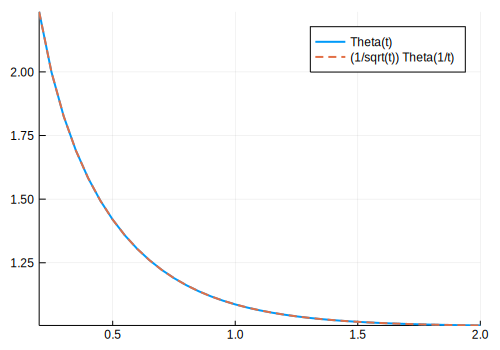

In [17]:
Theta(t; N=20) = iszero(N) ? one(t) : 1 + 2*sum(n->e^(-π*n^2*t), 1:N)
t = 0.2:0.05:2.0
A = Theta.(t)
B = 1./sqrt.(t).*Theta.(1./t)
plot(size=(500, 350))
plot!(t, B, label="Theta(t)",               lw=2)
plot!(t, A, label="(1/sqrt(t)) Theta(1/t)", lw=2, ls=:dash)

**問題:** $t=0.1$ のとき, まず $\ds\frac{1}{\sqrt{t}}\Theta\left(\frac{1}{t}\right)$ の近似値を

$$
\frac{1}{\sqrt{t}}\left(1 + 2\sum_{n=1}^N e^{-\pi n^2/t}\right)
$$

の $N=1$ の場合を用いて計算せよ. そして, $\Theta(t)$ を

$$
1 + 2\sum_{n=1}^N e^{-\pi n^2 t}
$$

で近似するとき, $N\geqq 10$ としなければ, 上と同じ精度が得られないことを確認せよ. $t>0$ が小さいときには $\Theta(t)$ の定義に基いて直接的に数値計算するより, モジュラー変換を経由して数値計算した方が効率的である. $\QED$

次のセルを見よ.

In [18]:
Theta(t; N=20) = iszero(N) ? one(t) : 1 + 2*sum(n->e^(-π*n^2*t), 1:N)
t = 0.1
@show 1/√t*Theta(1/t; N=0)
@show 1/√t*Theta(1/t; N=1)
@show 1/√t*Theta(1/t; N=2)
@show Theta(t; N=9);
@show Theta(t; N=10);
@show Theta(t; N=11);

(1 / √t) * Theta(1 / t; N=0) = 3.162277660168379
(1 / √t) * Theta(1 / t; N=1) = 3.162277660168523
(1 / √t) * Theta(1 / t; N=2) = 3.162277660168523
Theta(t; N=9) = 3.1622776601684772
Theta(t; N=10) = 3.1622776601685225
Theta(t; N=11) = 3.1622776601685225
